In [1]:
import os
import sys
import random

In [2]:
import numpy as np     
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import cv2

In [5]:
sys.path.append('../utils/')

In [6]:
from dlc_helper import DLC_tracking

In [7]:
from video_utils import find_square_bounding

In [8]:
import ipywidgets.widgets as widgets
from ipywidgets import interact, interact_manual

 # Import the results

In [9]:
df_results_control = pd.read_hdf('../../data/umap_hdbscan_control.h5')

In [10]:
df_results = pd.read_hdf('../../results/UMAP_HDBSCANclustering_19072023_1230.h5', key='features_with_results')

In [11]:
df_results_control.rename(columns={'hdbscan_clusters':'hdbscan_old', 'umap_raw_0':'umap_old_raw_0', 'umap_raw_1':'umap_old_raw_1'}, inplace=True)

In [12]:
# df_results_control = df_results_control.join(df_results)

In [13]:
df_results_control['umap_raw_0'] = df_results['umap_raw_0']
df_results_control['umap_raw_1'] = df_results['umap_raw_1']
df_results_control['hdbscan_clusters'] = df_results['hdbscan_plus']
df_results_control['hdbscan_clusters'] = df_results['hdbscan_plus']

# Plot the UMAP & clustering results

In [14]:
clusters_control = list(df_results_control['hdbscan_clusters'])

In [19]:
embedding = df_results_control.filter(like = 'umap_raw').values
embedding.shape

(1940535, 2)

In [20]:
dict_clusters = {f'cluster_{i}':np.sum(clusters_control==i) for i in list(np.unique(clusters_control))}
dict_clusters

{'cluster_-1': 5094,
 'cluster_0': 476188,
 'cluster_1': 321696,
 'cluster_2': 33475,
 'cluster_3': 1104082}

In [21]:
c_pal = sns.color_palette('tab10', 10)
c_dict = {i: c_pal[i+1] for i in np.unique(clusters_control)}
labels_c = [c_dict[lab] for lab in clusters_control]

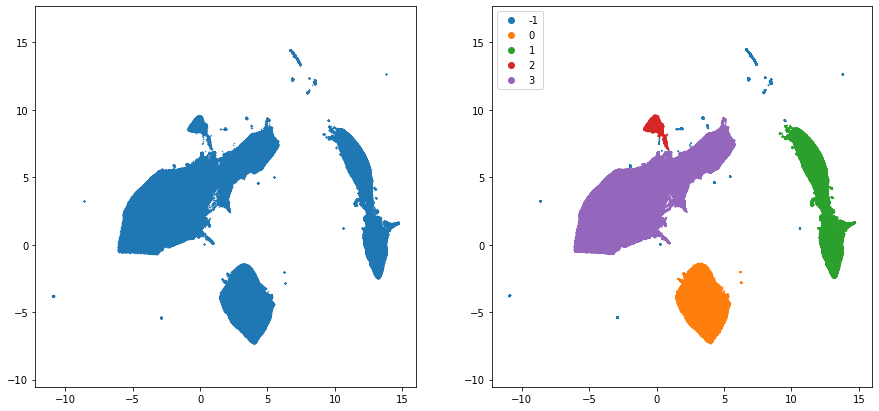

In [80]:
fig, axes = plt.subplots(1,2, figsize=(15,7))
axes= axes.ravel()
axes[0].scatter(embedding[:, 0],embedding[:, 1], s=0.2)
axes[1].scatter(
    embedding[:, 0],
    embedding[:, 1], c=labels_c, s=1)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in c_dict.values()]
plt.legend(markers, c_dict.keys(), numpoints=1)

for ax in axes:
    ax.set_aspect('equal', 'datalim')
    
fig.savefig('../../results/umap_clustered.png')

In [24]:
df_results_control.groupby('hdbscan_clusters').count()

,filename,frame,path_to_video,filename_video,date,time,light,drugs,duration,age,stim_on,stim_off,stim_RGB,dlc_result_file,umap_old_raw_0,umap_old_raw_1,hdbscan_old,umap_raw_0,umap_raw_1
hdbscan_clusters,,,,,,,,,,,,,,,,,,,
-1,5094,5094,5094,5094,5094,5094,5094,5094,5094,5094,0,0,0,5094,5094,5094,5094,5094,5094
0,476188,476188,476188,476188,476188,476188,476188,476188,476188,476188,0,0,0,476188,476188,476188,476188,476188,476188
1,321696,321696,321696,321696,321696,321696,321696,321696,321696,321696,0,0,0,321696,321696,321696,321696,321696,321696
2,33475,33475,33475,33475,33475,33475,33475,33475,33475,33475,0,0,0,33475,33475,33475,33475,33475,33475
3,1104082,1104082,1104082,1104082,1104082,1104082,1104082,1104082,1104082,1104082,0,0,0,1104082,1104082,1104082,1104082,1104082,1104082


# Check feature statistics in each groups

In [25]:
df_feats = pd.read_hdf('../../results/featureset_used_for_UMAPclustering_18072023.h5', key='features_clean')
df_feats.columns

Index(['len_NT_to_TT', 'len_sum_of_parts', 'len_mean_of_parts', 'curv_NT',
       'curv_DH1', 'curv_DH2', 'curv_DNP', 'curv_DTP1', 'curv_DTP2',
       'curv_DTP3', 'curv_DTP4', 'curv_DTP5', 'curv_DTP6', 'curv_DTP7',
       'curv_DTP8', 'curv_DTP9', 'curv_DTP10', 'curv_TT', 'quirkiness',
       'speed_NT', 'speed_DH1', 'speed_DH2', 'speed_DNP', 'speed_DTP1',
       'speed_DTP2', 'speed_DTP3', 'speed_DTP4', 'speed_DTP5', 'speed_DTP6',
       'speed_DTP7', 'speed_DTP8', 'speed_DTP9', 'speed_DTP10', 'speed_TT',
       'speed_VTP10', 'speed_VTP9', 'speed_VTP8', 'speed_VTP7', 'speed_VTP6',
       'speed_VTP5', 'speed_VTP4', 'speed_VTP3', 'speed_VTP2', 'speed_VTP1',
       'speed_VNP', 'speed_MOUTH', 'MOUTH', 'filename', 'frame',
       'path_to_video', 'filename_video', 'date', 'time', 'light', 'drugs',
       'duration', 'age', 'stim_on', 'stim_off', 'stim_RGB',
       'dlc_result_file'],
      dtype='object')

In [26]:
df_results_control.columns

Index(['filename', 'frame', 'path_to_video', 'filename_video', 'date', 'time',
       'light', 'drugs', 'duration', 'age', 'stim_on', 'stim_off', 'stim_RGB',
       'dlc_result_file', 'umap_old_raw_0', 'umap_old_raw_1', 'hdbscan_old',
       'umap_raw_0', 'umap_raw_1', 'hdbscan_clusters'],
      dtype='object')

In [27]:
df_feats_with_clusters = pd.merge(df_results_control, df_feats, on=['filename', 'frame'])

In [28]:
grouped_feats = df_feats_with_clusters.groupby('hdbscan_clusters')

## Speed_MOUTH

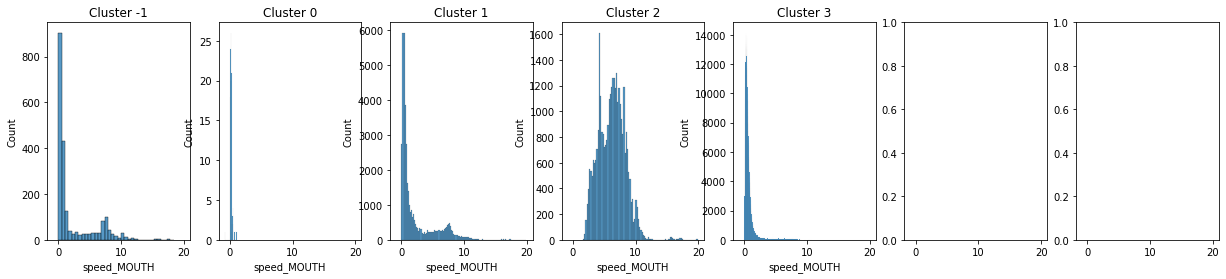

In [29]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True)
for i, (cluster, group) in enumerate(grouped_feats):
    sns.histplot(data=group, x='speed_MOUTH', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

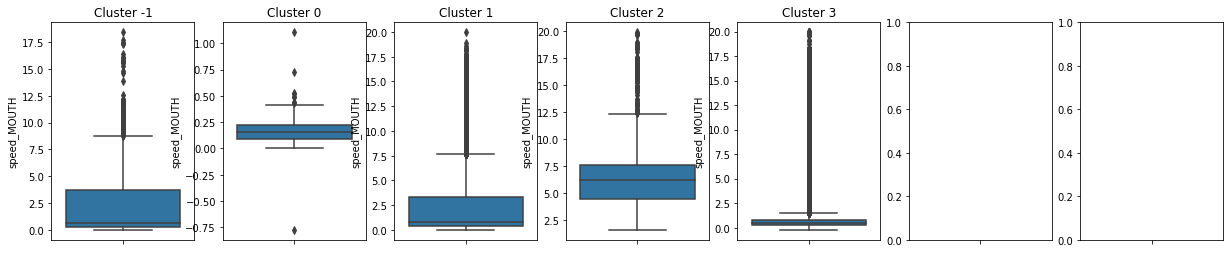

In [30]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True)
for i, (cluster, group) in enumerate(grouped_feats):
    sns.boxplot(data=group, y='speed_MOUTH', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

## Speed_V(entral)

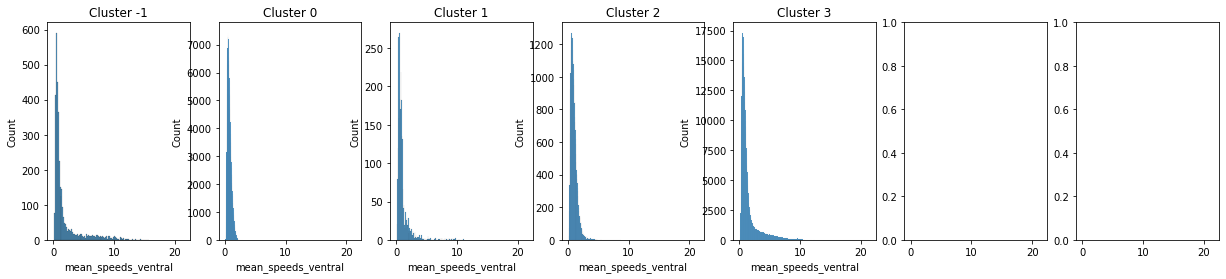

In [31]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True)
for i, (cluster, group) in enumerate(grouped_feats):
    group['mean_speeds_ventral'] = group.filter(like='speed_V').mean(axis=1)
    sns.histplot(data=group, x='mean_speeds_ventral', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

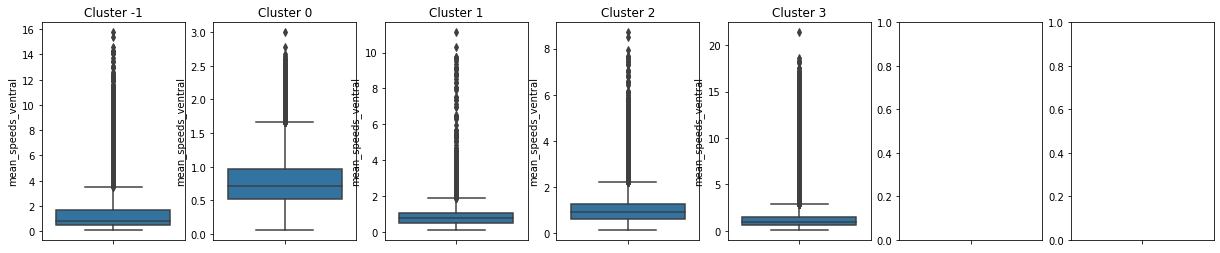

In [32]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True)
for i, (cluster, group) in enumerate(grouped_feats):
    group['mean_speeds_ventral'] = group.filter(like='speed_V').mean(axis=1)
    sns.boxplot(data=group, y='mean_speeds_ventral', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

## Speed_D(orsal)

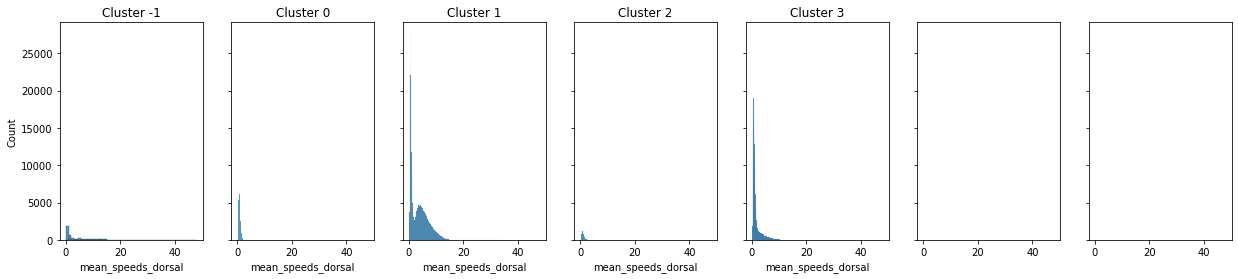

In [33]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True, sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    group =  group.fillna(value=-1)
    group['mean_speeds_dorsal'] = group.filter(like='speed_D').mean(axis=1)
    sns.histplot(data=group, x='mean_speeds_dorsal', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

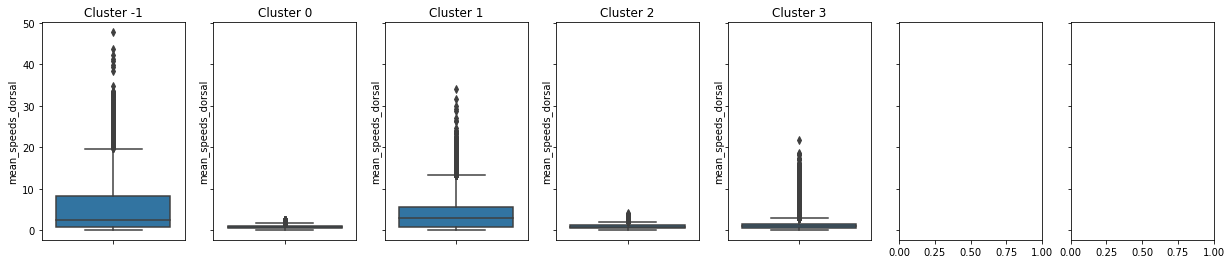

In [34]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    group =  group.fillna(value=-1)
    group['mean_speeds_dorsal'] = group.filter(like='speed_D').mean(axis=1)
    sns.boxplot(data=group, y='mean_speeds_dorsal', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

## Speed_NT

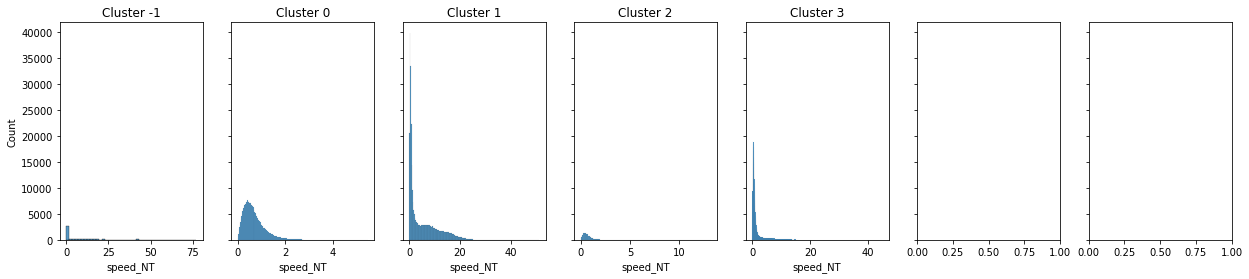

In [35]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    sns.histplot(data=group, x='speed_NT', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

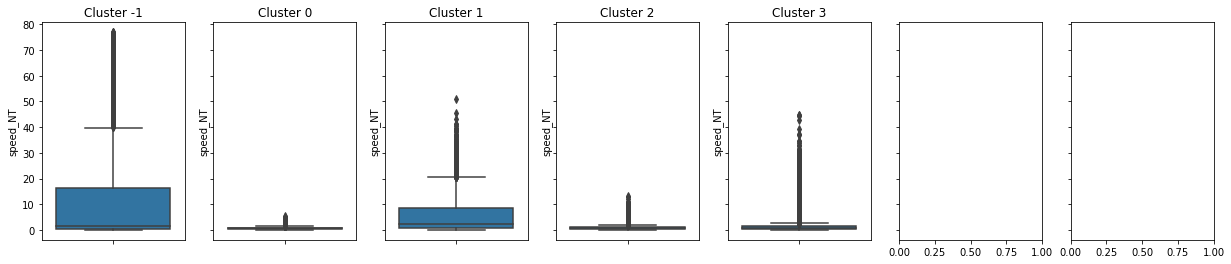

In [36]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    sns.boxplot(data=group, y='speed_NT', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

## Curvatures

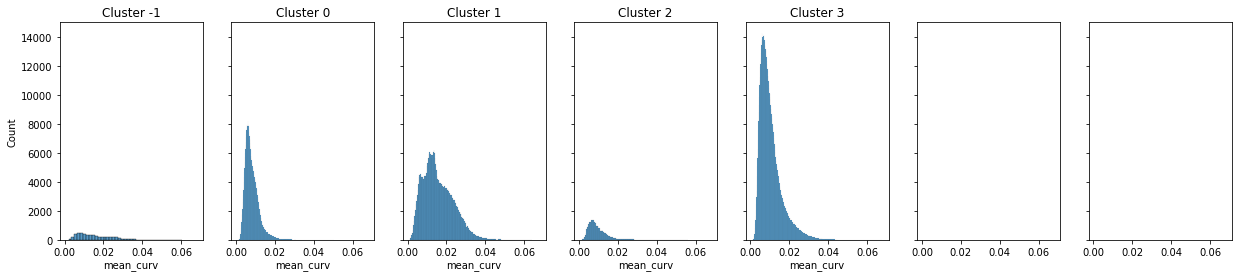

In [37]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True, sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    group =  group.fillna(value=-1)
    group['mean_curv'] = group.filter(like='curv').abs().mean(axis=1)
    sns.histplot(data=group, x='mean_curv', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

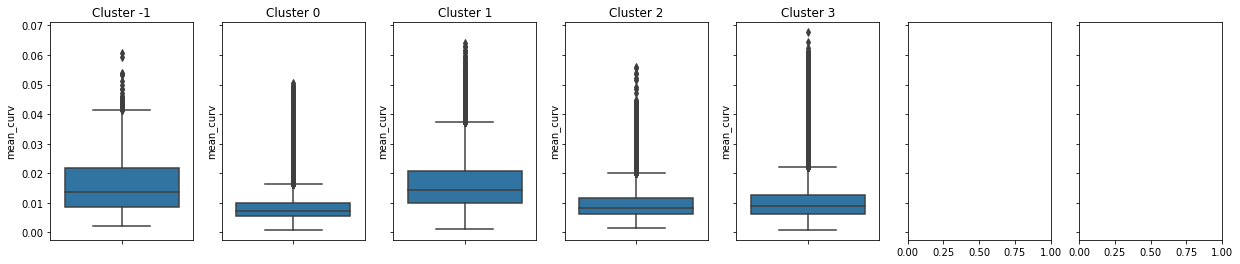

In [38]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    group =  group.fillna(value=-1)
    group['mean_curv'] = group.filter(like='curv').abs().mean(axis=1)
    sns.boxplot(data=group, y='mean_curv', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

## Quirkiness

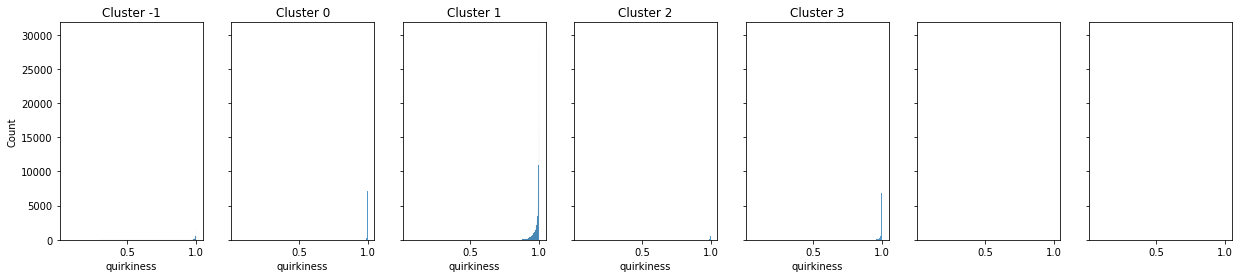

In [39]:
fig, axes = plt.subplots(1,7, figsize = (21,4), sharex=True, sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    sns.histplot(data=group, x='quirkiness', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

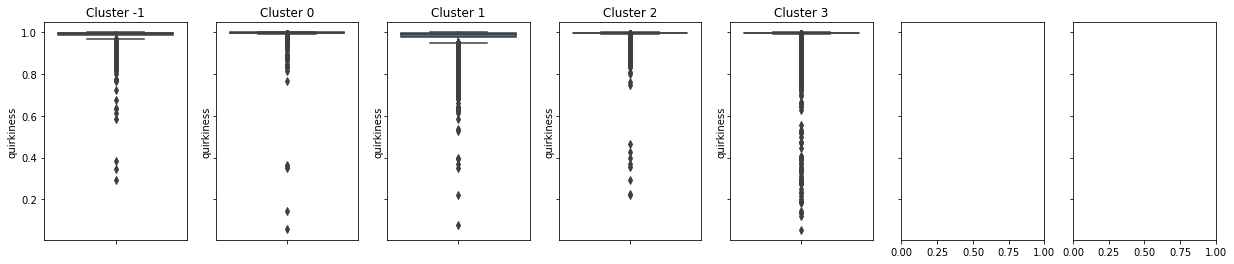

In [40]:
fig, axes = plt.subplots(1,7, figsize = (21,4),sharey=True)
for i, (cluster, group) in enumerate(grouped_feats):
    sns.boxplot(data=group, y='quirkiness', ax=axes[i])
    axes[i].set_title(f'Cluster {cluster}')

# Trajectories

In [41]:
filenames = list(df_results_control.filename.unique())

In [42]:
wid_fn = widgets.SelectMultiple(
    options=filenames,
    value=filenames[:2],
    rows=15,
    description='Filename',
    disabled=False
)

In [47]:
@interact_manual
def plot_trajectory(fns=wid_fn):
    
    for fn in fns:
        df_filename = df_results_control[df_results_control['filename']== fn]
        path_to_video = df_filename['path_to_video'].unique()[0]
        print(path_to_video)
    
    n_cols = len(fns)
    fig, axes = plt.subplots(1,n_cols,figsize=(n_cols*8,8), sharex=True, sharey=True)
    
    
    for i, fn in enumerate(fns):
        
        df_result_fn = df_results_control[df_results_control['filename'] == fn]
        
        # data from DLC 
        
        dlc_path = df_result_fn['dlc_result_file'].unique()[0]
        dlc_folder, dlc_filename = os.path.split(dlc_path)
        dlc_obj = DLC_tracking(dlc_filename, dlc_folder)
        
        # data from clustering
        df_cluster = pd.merge(dlc_obj.df_data, df_result_fn, on='frame')
        hue = [clus+1 for clus in df_cluster['hdbscan_clusters']]
        
        sns.scatterplot(data = df_cluster, x='NT_x',y='NT_y', s=2, hue=hue, ax=axes[i], palette='tab10')
        markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in c_dict.values()]
        axes[i].legend(markers, c_dict.keys(), numpoints=1)
        axes[i].set_aspect('equal')
        axes[i].set_title(fn)
    

interactive(children=(SelectMultiple(description='Filename', index=(0, 1, 2, 3, 4, 5), options=('20180719_1140…

# try annotating video

In [ ]:
dict_swims = {-1:'', 0:'right', 1:'swims', 2:'left', 3:'left'}

In [ ]:
cap = cv2.VideoCapture("")
ret, frame = cap.read()
fps = cap.get('CAP_PROP_FPS')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('../../results/output.avi',fourcc, 30.0, (1024, 1280))

# Obejction detection from stable camera

frame_count = 0
image_count = 0
while True:
    ret, frame = cap.read()
    frame_count += 1

    try:
        if (frame_count > 0) & (frame_count < len(state_seq)):
            height, width, _ = frame.shape
            x, y, w, h = dict_bbox[frame_count]
            cv2.putText(frame, str(state_seq[frame]) , (int(x), int(y) - 15), cv2.FONT_HERSHEY_PLAIN, 1, (255, 0, 0), 2)
            cv2.rectangle(frame, (int(x)-5,int(y)-5), (int(x) + int(w)+5, int(y) + int(h)+5), (0, 255, 0), 3)
            out.write(frame)
    except KeyError:
        print(f'missing key {frame_count}')
cap.release()
out.release()
cv2.destroyAllWindows()

# Checking frames

In [73]:
test_path_to_video = '/media/athira/Amphioxus1/20180724/Exp_20180724_173426_1_15m0s_None_None_None/20180724_173426_1_15m0s_None_None_None_INVERTED.avi'
df_test = df_results_control[df_results_control['path_to_video'] == test_path_to_video]
path_to_dlc_coords = df_test['dlc_result_file'].unique()[0]
dlc_folder, dlc_filename = os.path.split(path_to_dlc_coords)
dlc_obj = DLC_tracking(dlc_filename, dlc_folder)
dict_bbox = dlc_obj.find_bbox_dlc()

In [74]:
dict_rois = {}
for key in dict_bbox.keys():
    x, y, w, h = dict_bbox[key]
    mid_x = x + (w/2)
    mid_y = y + (h/2)
    try:
        x = int(x)
        y = int(y)
        w = int(w)
        h = int(h)
        x_new, y_new, w_new, h_new = find_square_bounding(x,y,w,h, height_max = 150, width_max = 150)
        dict_rois[key] = [x_new, y_new, w_new, h_new]

    except ValueError:
        print(f'Value Error encountered for frame {key}')
    except Exception as e:
        print(f'Error encountered')
        print(e)

In [75]:
df_test.groupby('hdbscan_clusters').nunique()

,filename,frame,path_to_video,filename_video,date,time,light,drugs,duration,age,stim_on,stim_off,stim_RGB,dlc_result_file,umap_old_raw_0,umap_old_raw_1,hdbscan_old,umap_raw_0,umap_raw_1
hdbscan_clusters,,,,,,,,,,,,,,,,,,,
-1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1
0,1,347,1,1,1,1,1,1,1,1,0,0,0,1,347,347,2,347,347
1,1,451,1,1,1,1,1,1,1,1,0,0,0,1,451,451,2,451,451
2,1,222,1,1,1,1,1,1,1,1,0,0,0,1,222,222,2,222,222
3,1,25542,1,1,1,1,1,1,1,1,0,0,0,1,25528,25533,4,25524,25532


-1 Cannot take a larger sample than population when 'replace=False'


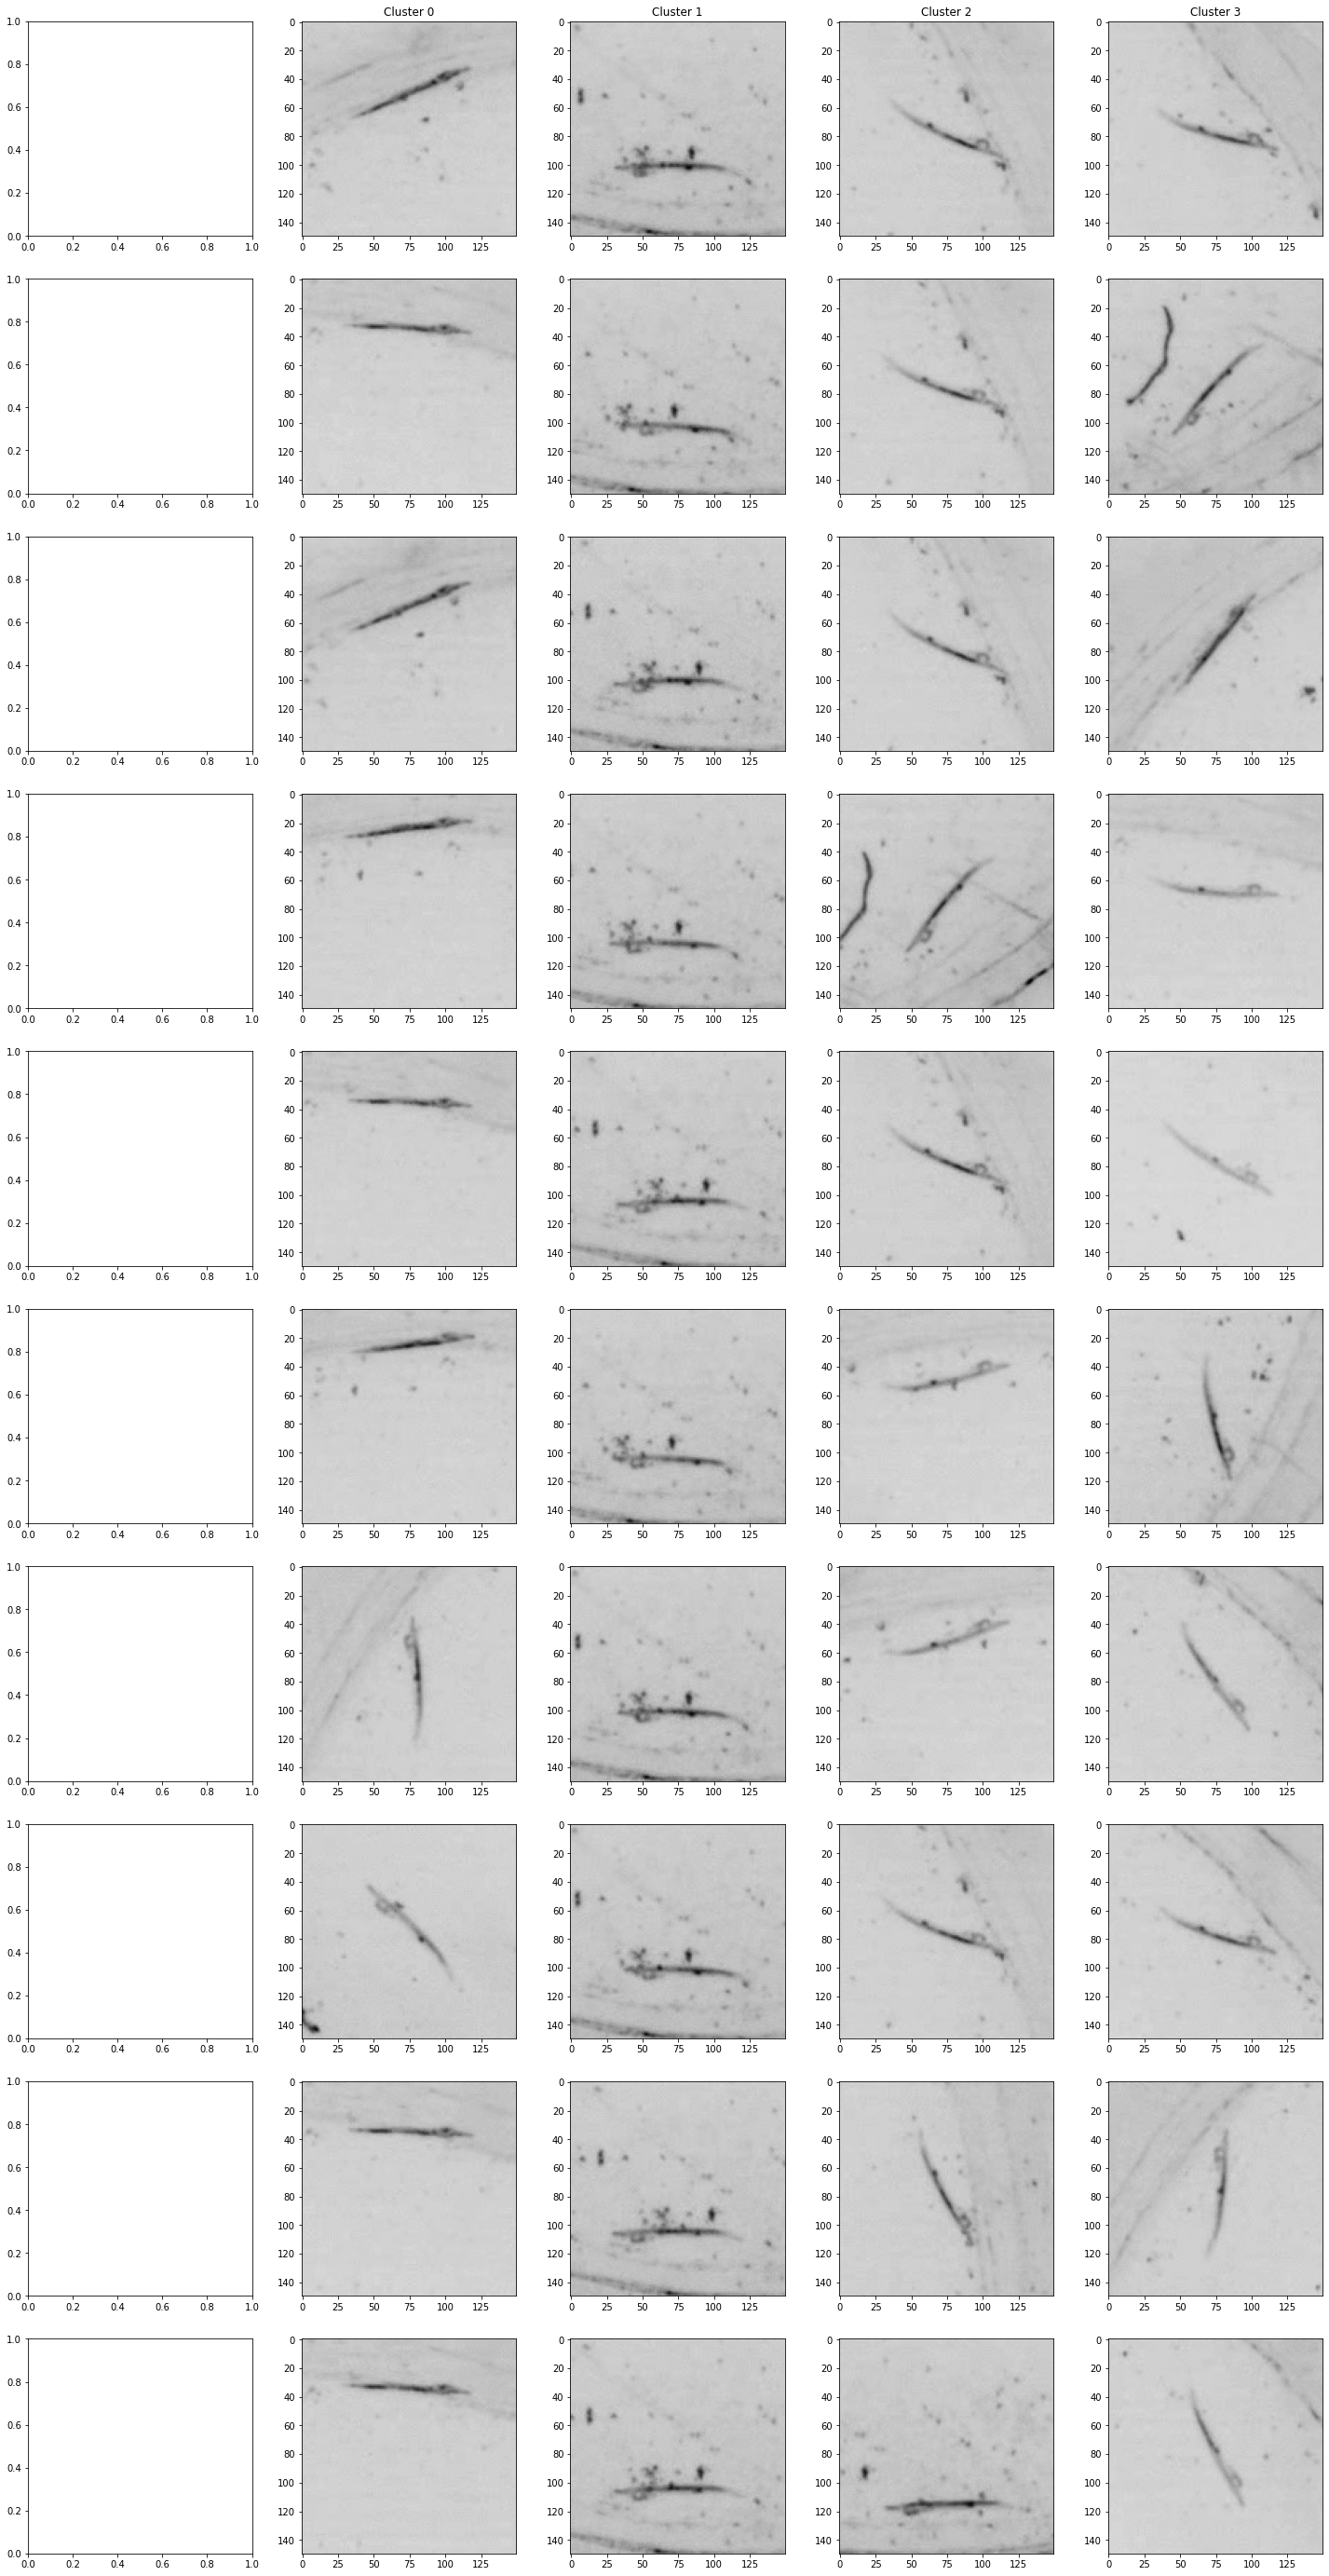

In [79]:
df_grouped = df_test.groupby('hdbscan_clusters')

fig, axes = plt.subplots(10, 5, figsize = (25, 50))
for i, (clus, group) in enumerate(df_grouped):
    try:
        samples = group.sample(10)
        sample_frames =  samples['frame']
        for j, sample_f in enumerate(sample_frames):
            image_path = f'/data/temp/athira/amphi_frames_19072023/Exp_20180724_173426/frame_{sample_f}.png'
            if os.path.isfile(image_path):
                image = plt.imread(image_path)
                x, y, w, h = dict_rois[sample_f]
                x = int(x)
                y = int(y)
                w = int(w)
                h = int(h)
                cropped_image = image[y:y+h, x:x+w]
                axes[j][i].imshow(cropped_image)
                if j == 0:
                    axes[j][i].set_title(f'Cluster {clus}')
    except Exception as e:
        print(clus, e)


# Picking frames

In [ ]:
def get_rois_per_video(path_to_video, path_to_dlc_coords, crop=True):
    
    

    dlc_folder, dlc_filename = os.path.split(path_to_dlc_coords)
    dlc_obj = DLC_tracking(dlc_filename, dlc_folder)
    
    dict_bbox = dlc_obj.find_bbox_dlc()
    dict_rois = {}
    
    cap = cv2.VideoCapture(path_to_video)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    count = 0
    while count < total_frames:
        _, image = cap.read()

        count += 1
        if crop:
            # Find coords of the roi corners
            x, y, w, h = dict_bbox[count-1]
            mid_x = x + (w/2)
            mid_y = y + (h/2)
            try:
                x = int(x)
                y = int(y)
                w = int(w)
                h = int(h)
                x_new, y_new, w_new, h_new = find_square_bounding(x,y,w,h, height_max = 150, width_max = 150)
                roi_box_padded = image[y_new:y_new+h_new, x_new:x_new+w_new]
                dict_rois[count-1] = roi_box_padded

            except ValueError:
                print(f'Value Error encountered for frame {count-1}')
            except Exception as e:
                print(f'Error encountered')
                print(e)

        else:
            dict_rois[count-1] = image
            
#         cv2.waitKey(30)
            
    cap.release()
#     cv2.destroyAllWindows()
        
    return dict_rois

In [ ]:
@interact_manual
def plot_trajectory(filename=filenames):
    
    df_filename = df_results_control[df_results_control['filename']== filename]
    clusters_fn = sorted(df_filename['hdbscan_clusters'].unique())
    path_to_video = df_filename['path_to_video'].unique()[0]
    path_to_dlc_coords = df_filename['dlc_result_file'].unique()[0]
    test_dict = get_rois_per_video(path_to_video, path_to_dlc_coords)
    
    df_grouped = df_filename.groupby('hdbscan_clusters')
    
    for i, clus in (enumerate(clusters_fn)):

        fig, axes = plt.subplots(1, 5, figsize=(5*8, 8))
        axes = axes.ravel()
        df = df_grouped.get_group(clus)
        if len(df.index) > 5:
            df_samples = df.sample(5)
        else:
            df_samples = df

        frames = list(df_samples['frame'])

        for j, f in enumerate(frames):
            axes[j].imshow(test_dict[f])
            axes[j].set_title(f)

            if j == 0:
                axes[j].set_ylabel(f'cluster: {clus}')
    plt.show()